### REFERÊNCIA CÓDIGO BASE

https://www.youtube.com/watch?v=WOUMZatSiLM

<hr>

### IMPORTAÇÕES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as symbols
from pandas.api.types import is_numeric_dtype

> <hr>

### Observações Implementação

In [5]:
# esqueci completamente da parte do kernel kkkkkkk rindo de chorar
# vai entrar só na kfcmkh oficial

In [6]:
# passo a passo: reunião com o professor

# basicamente tudo é matriz, não preciso muito inicialmente preocupar com o plot dos clusters
# a variação dos valores na matriz vai me contar se deu certo ou errado
# lembrar que conceitos com nomes muito específicos, tipo protótipos, tão definidpos lá na tabelinha de conceitos

# PASSO A PASSO
# matriz com os dados, depende do dataset (NxP)
# aí tem a matriz U, com os valores de membership (NxK, sendo o número de clusters)
# tem a matriz de protótipos também (G)(que é a matriz de centroides)
# trabalhar com a função objetivo em função de U e de G 
# primeiro fixa U e encontra G, depois vai pro passo 2
# protótipos podem ser definidos com base nos dados iniciais, por mim ou aleatoriamente 
# a foto está no celular e tem anotações no caderno

### DATASET

> Permanece o mesmo por enquanto;

In [7]:
# substituindo 'caminho/do/seu/iris.data' pelo caminho real do seu arquivo Iris.data e 'iris.csv' pelo nome desejado para o arquivo CSV de saída.
input_file = 'C:\\JupyterLab\\PAPL-UFPE\\ML-Fuzzy\\Testes\\iris.data'
output_file = 'iris.csv'

# carregando arquivo no pandas
iris_data = pd.read_csv(input_file, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# salvando em comma separated values (csv)
iris_data.to_csv(output_file, index=False)

In [8]:
# normalização
for index in iris_data.columns: # em suma, para as colunas do DataFrame, vamos analisar se os dados são numéricos
    # se os dados forem numéricos, eles serão normalizados
    if is_numeric_dtype(iris_data[index][0]): # retomando uma função do pandas
        iris_data[index] = iris_data[index]/max(iris_data[index])

In [9]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.645570,0.795455,0.202899,0.08,Iris-setosa
1,0.620253,0.681818,0.202899,0.08,Iris-setosa
2,0.594937,0.727273,0.188406,0.08,Iris-setosa
3,0.582278,0.704545,0.217391,0.08,Iris-setosa
4,0.632911,0.818182,0.202899,0.08,Iris-setosa


**ANALISANDO A DISTRIBUIÇÃO DOS DADOS**

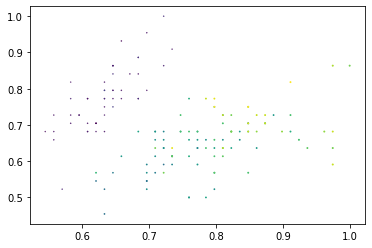

In [10]:
# todos os dados
data=iris_data.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
plt.scatter(data.sepal_length, data.sepal_width, data.petal_length, data.petal_width)

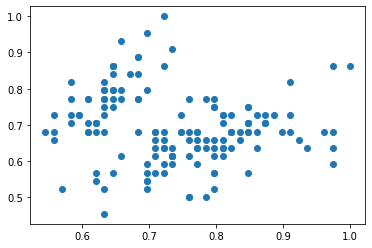

In [11]:
# data only according to sepal
data=iris_data.loc[:,['sepal_length', 'sepal_width']]
plt.scatter(data.sepal_length, data.sepal_width)

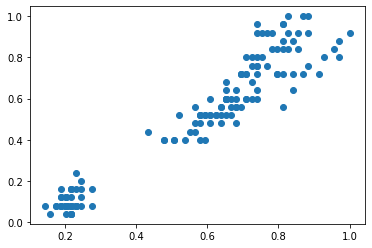

In [12]:
# data accoording only to petal
data=iris_data.loc[:,['petal_length', 'petal_width']]
plt.scatter(data.petal_length, data.petal_width)

> <hr>

### FUZZY C-MEANS

In [13]:
iris_data = np.array(iris_data)
iris_data # shoukd be a 2d array

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08,
        'Iris-setosa'],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08, 'Iris-setosa'],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16, 'Iris-setosa'],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12, 'Iris-setosa'],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04,
        'Iris-setosa'],
       [0.68

In [14]:
iris_data_without_last_column = iris_data[:, :-1]
iris_data_without_last_column

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04],
       [0.6835443037974683, 0.8409090909090908, 0.21739130434782608,
        0.08],
       [0.6075949367088607, 0.7727272727272726, 0.2318840579710145, 0.08],
       [0.607594936

**CONDIÇÕES INICIAIS**

> Acho que aqui vai caber definir algumas coisas como funções e não mais como valores fixos

In [15]:
# number of clusters
    # acho que o K definido assim dá certo assim pq eu conheço o dataset né
    # mas no caso tb não tá dando tão certo assim no plot
K = 3

# fuzziness value 
m = 2

# membership
U = np.random.rand(iris_data_without_last_column.shape[0], K)
U # lembrando que os dados já foram normalizados

# protótipos

array([[0.77727978, 0.39209431, 0.87996025],
       [0.38431884, 0.01011939, 0.01451891],
       [0.57836429, 0.48688138, 0.59068314],
       [0.17653361, 0.12708804, 0.71521301],
       [0.64837335, 0.63034503, 0.96543526],
       [0.05009016, 0.24717016, 0.39641538],
       [0.08704724, 0.47471202, 0.55123092],
       [0.32991927, 0.56476116, 0.90057202],
       [0.27242977, 0.74620515, 0.41393677],
       [0.13842256, 0.86895673, 0.0884512 ],
       [0.50866734, 0.80731118, 0.8774618 ],
       [0.54583866, 0.02709158, 0.11460148],
       [0.21048776, 0.81465254, 0.61604531],
       [0.39181868, 0.96709494, 0.96941651],
       [0.96878525, 0.58917013, 0.02860426],
       [0.73576384, 0.89005404, 0.58919512],
       [0.13155562, 0.62719481, 0.77915238],
       [0.71864123, 0.55957648, 0.16944466],
       [0.3064002 , 0.24514192, 0.44541286],
       [0.86457068, 0.70082883, 0.60189124],
       [0.12234263, 0.67361428, 0.96933733],
       [0.12146016, 0.62663365, 0.76236492],
       [0.

In [16]:
# calculo dos centroides
# envolve matriz
# soma da multiplicação de cada 

# precisamos de 3 centroides
def calculando_centroides(iris_data_without_last_column, K, U, m):
    centroides = np.zeros((K, iris_data_without_last_column.shape[1]))
    for i in range (K):
        centroides[i,:] = np.sum((U[:, i] ** m)[:, np.newaxis] * iris_data_without_last_column, axis = 0)/np.sum(U[:, i] ** m)
    return centroides

In [17]:
centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

In [26]:
def distancia_gaussiana(iris_data_without_last_column, centroides, sigma):
    """
    Calcula a distância usando a função gaussiana entre as matrizes x e y.

    Parâmetros:
    - x, y: os pontos a serem comparados, sendo eles os dados e os centroides.
    - sigma: PARÂMETRO QUE CONTROLA A > LARGURA < DO KERNEL GAUSSIANO

    Retorna:
    - Uma matriz de distâncias onde cada elemento (i, j) representa a distância gaussiana entre x[i] e y[j].
    """
    #print("Shapes em distancia_gaussiana:")
    #print("x shape:", iris_data_without_last_column.shape)
    #print("y shape:", centroides.shape)
    #print()
    
    # tentando resolver o problema dimensional
    iris_data_without_last_column = iris_data_without_last_column.reshape(1, -1)
    
    #euclidiana = np.linalg.norm(iris_data_without_last_column[:, np.newaxis, :] - centroides, axis=1)  # Distâncias euclidianas entre todos os pares de pontos
    diferenca = iris_data_without_last_column - centroides
    euclidiana = np.sqrt(np.sum(diferenca**2))
    gaussian_values = np.exp(- (euclidiana**2) / (2 * sigma**2))  # Função gaussiana # dá pra escrever o sigma diferente se der erro
    return gaussian_values

In [27]:
def matriz_dg(iris_data_without_last_column, centroides, sigma):
    """
    Calcula a matriz de distâncias usando a função gaussiana entre todos os pontos e os centroides.

    Parâmetros:
    - data: matriz representando os pontos a serem comparados.
    - centroides: matriz c/ os centroides.
    - sigma: PARÂMETRO QUE CONTROLA A > LARGURA < DO KERNEL GAUSSIANO

    Retorna:
    - Uma matriz de distâncias onde cada elemento (i, j) representa a distância gaussiana entre o ponto i e o centroide j.
    """
    #print("Shapes em matriz_dg:")
    #print("iris_data_without_last_column shape:", iris_data_without_last_column.shape)
    #print("centroides shape:", centroides.shape)
    #print()
    
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]

    distancias = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distancias[i, j] = distancia_gaussiana(iris_data_without_last_column[i], centroides[j], sigma)

    return distancias

In [28]:
# só um exemplo
sigma_value = 1.0
# Supondo que você já tenha definido K, U, m, sigma_value, iris_data_without_last_column e centroids

# Calcula a matriz de distâncias usando a função gaussian_distance_matrix
d_matriz = matriz_dg(iris_data_without_last_column, centroides, sigma_value)

# Exibe a matriz de distâncias
print("Matriz de Distâncias:")
print(d_matriz)

Matriz de Distâncias:
[[0.85798962 0.87664829 0.86672535]
 [0.85830371 0.87753427 0.86808973]
 [0.85119449 0.87048623 0.8606998 ]
 [0.85818372 0.87730741 0.8678388 ]
 [0.85497273 0.87355602 0.86353615]
 [0.88857732 0.90384099 0.89494851]
 [0.86580745 0.88375573 0.87433284]
 [0.86250416 0.88117606 0.87144149]
 [0.84909634 0.86856814 0.85920328]
 [0.84809388 0.86808495 0.85820291]
 [0.86061675 0.87870126 0.86877051]
 [0.86384322 0.88244918 0.87280722]
 [0.84221271 0.86245738 0.85256748]
 [0.8200509  0.84081079 0.83060189]
 [0.83956664 0.85738469 0.84702011]
 [0.85884818 0.87344667 0.86408088]
 [0.8716618  0.88761302 0.87824876]
 [0.87154104 0.88914979 0.87968661]
 [0.88084994 0.89719504 0.8879474 ]
 [0.86875237 0.88580746 0.87621118]
 [0.87428341 0.892418   0.8829779 ]
 [0.88390586 0.89998326 0.89095281]
 [0.83080127 0.85008133 0.83963049]
 [0.91026175 0.92526135 0.91738831]
 [0.87500632 0.89311387 0.88383168]
 [0.8678877  0.88676942 0.877566  ]
 [0.89272795 0.90905128 0.90040073]
 [0.86

In [21]:
def fun_objetivo(U, matriz_dg, m):
    c, n = U.shape
    objetivo = 0

    for i in range(c):
        for j in range(n):
            objetivo += U[i, j] ** m * matriz_dg[i, j] ** 2

    return objetivo

In [22]:
#print(d_matriz) #supostamente, distância de cada ponto em relação a cada centroide

**OBSERVAÇÕES**
<br>uh to meio na dúvida aqui
<br> preciso que a distância seja calculada para cada ponto em relação a cada um dos centroides, mas não sei <br>se isso está acontecendo
<br>ACHO que é isso que está rolando sim

In [23]:
def membership_c (iris_data_without_last_column, centroides, K, m):
    U_novo = np.zeros_like(d_matriz)
    # iterar sobre K
    for i in range(K):
        U_novo[:, i] = d_matriz[:, i]

    U_novo = 1/(U_novo ** (2/(m-1)) * np.sum((1/U_novo) ** (2/(m-1)), axis = 1)[:, np.newaxis])
    return U_novo


# Ou simplesmente copiar todos os valores da matriz de distâncias para U_novo (?)
#U_novo = d_matriz.copy()

In [24]:
N = iris_data_without_last_column.shape[0] # número de dados

In [25]:
def fun_objetivo(U, matriz_dg, m):
    K, N = U.shape
    objetivo = 0

    for i in range(K):
        for j in range(N):
            objetivo += U[i, j] ** m * matriz_dg[i, j] ** 2

    return objetivo

#U_novo = 1/(U_novo ** (2/(m-1)) * np.sum((1/U_novo) ** (2/(m-1)), axis = 1)[:, np.newaxis])
#U_novo
U_novo = membership_c(iris_data_without_last_column, centroides, K, m)


maximo = 50
for iteration in range(maximo): 
    centroides = calculando_centroides(iris_data_without_last_column, K, U, m)
    U_novo = membership_c(iris_data_without_last_column, centroides, K, m)
    velho_obj = fun_objetivo(U_novo, matriz_dg, m)

    # Atualizando os valores de pertinência usando sua própria função
    U_novo = membership_c(iris_data_without_last_column, centroides, K, m)
    labels = np.argmax(U_novo, axis = 1)
    
    novo_obj = fun_objetivo(U_novo, matriz_dg, m)

    # Verificando convergência
    if np.abs(novo_obj - velho_obj) < tolerance:
        break

NameError: name 'calculate_objective_function' is not defined